In [1]:
import numpy as np
from scipy.linalg import eigh
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
data.info()
data = data.dropna()
features = data.iloc[:, 1:].values
print(features)
num_clusters = 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
[[1.710e+00 2.430e+00 1.560e+01 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.780e+00

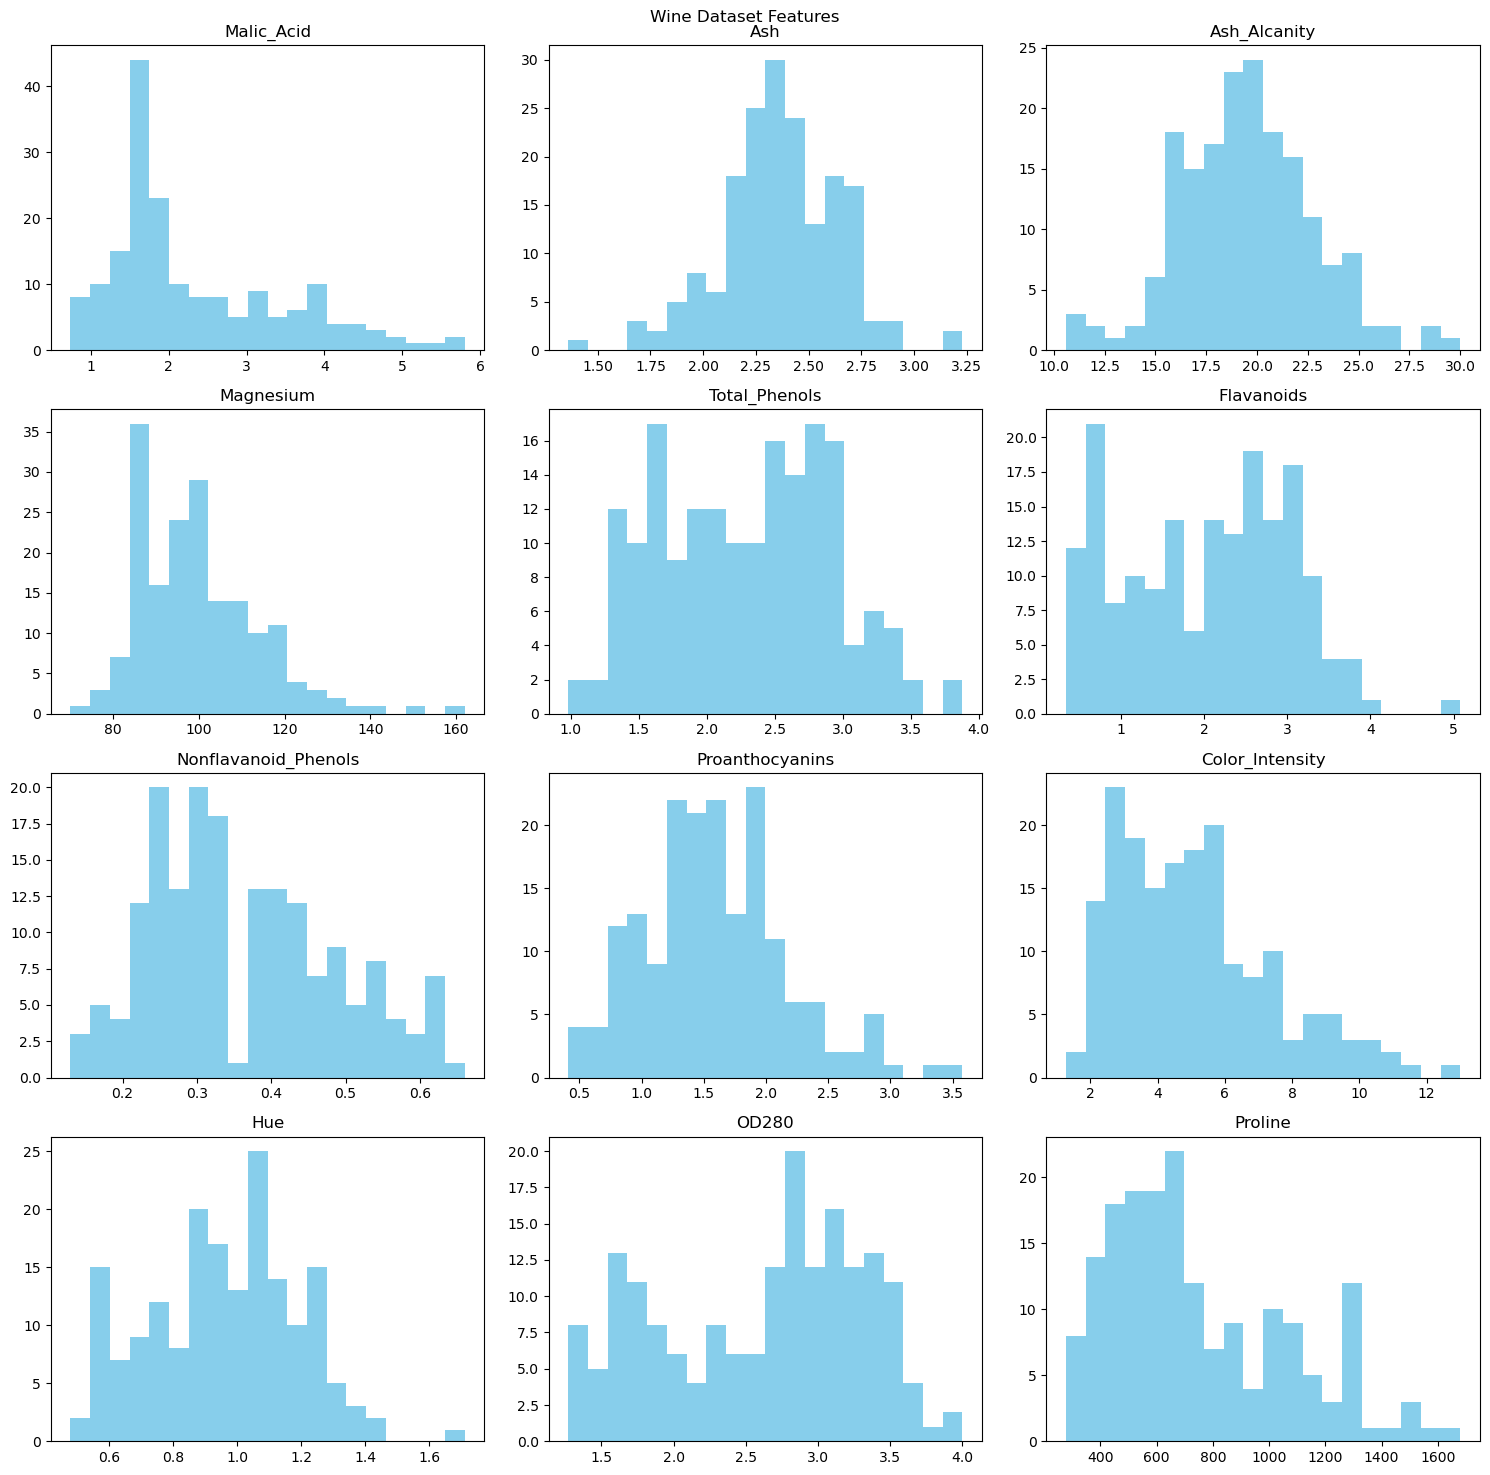

In [3]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Wine Dataset Features')

for i in range(4):
    for j in range(3):
        axs[i, j].hist(features[:, (i*3) + j], bins=20, color='skyblue')
        axs[i, j].set_title(data.columns[(i*3) + j + 1])

plt.tight_layout()
plt.show()

In [4]:
def spectral_clustering(data, num_clusters, similarity_measure='rbf', gamma=1.0):
    # Compute similarity matrix
    similarity_matrix = compute_similarity_matrix(data, similarity_measure, gamma)
    
    # Compute the Laplacian matrix
    laplacian_matrix = compute_laplacian_matrix(similarity_matrix)
    
    # Compute the eigenvectors and eigenvalues of the Laplacian matrix
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    
    # Sort the eigenvalues and eigenvectors in ascending order
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Use the eigenvectors corresponding to the smallest eigenvalues as features
    feature_matrix = sorted_eigenvectors[:, :num_clusters]
    
    # Perform clustering by assigning each data point to the nearest eigenvector
    pairwise_distances = np.linalg.norm(feature_matrix[:, np.newaxis] - feature_matrix[np.newaxis, :], axis=-1)
    labels = np.argmin(pairwise_distances, axis=1)
    
    return labels

In [5]:
def compute_similarity_matrix(data, similarity_measure='rbf', gamma=1.0):
    if similarity_measure == 'rbf':
        pairwise_distances = np.sum((data[:, np.newaxis] - data[np.newaxis, :]) ** 2, axis=2)
        similarity_matrix = np.exp(-gamma * pairwise_distances)
    elif similarity_measure == 'cosine':
        normalized_data = normalize(data)
        similarity_matrix = np.dot(normalized_data, normalized_data.T)
    else:
        raise ValueError("Invalid similarity measure")
    
    return similarity_matrix

In [6]:
def compute_laplacian_matrix(similarity_matrix):
    degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
    laplacian_matrix = degree_matrix - similarity_matrix
    return laplacian_matrix

In [7]:
predicted_labels = spectral_clustering(features, num_clusters)

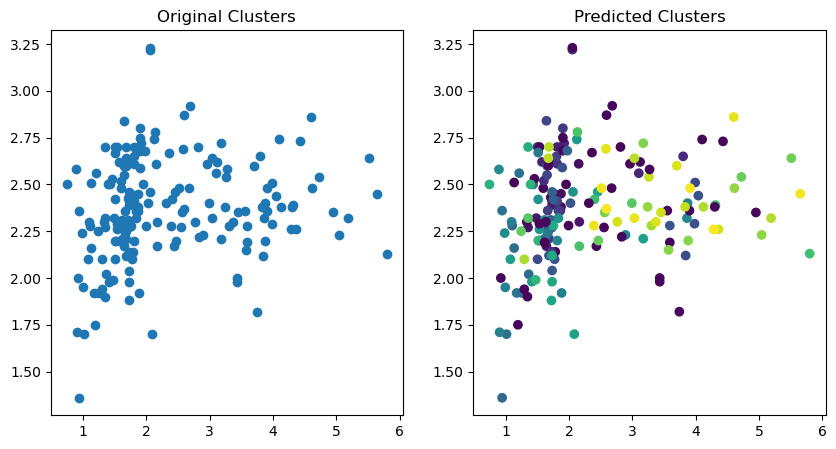

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(features[:, 0], features[:, 1])
plt.title("Original Clusters")
plt.subplot(122)
plt.scatter(features[:, 0], features[:, 1], c=predicted_labels)
plt.title("Predicted Clusters")
plt.show()


In [9]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
silhouette = silhouette_score(features, predicted_labels)
print("Silhouette Score: {:.4f}".format(silhouette))

Silhouette Score: -0.2100
